The goal of this assignment is for you to explore a complete analysis using the unsupervised learning techniques covered in the last class. You’ll extend what you’ve learned by combining PCA as a preprocessing step to K Means clustering using data that consist of measurements of cell nuclei of human breast masses. Values in this data set describe characteristics of the cell nuclei present in digitized images of a fine needle aspiration (FNA) of a breast mass. For example radius (i.e. mean of distances from center to points on the perimeter), texture (i.e. standard deviation of gray-scale values), and smoothness (local variation in radius lengths). Summary information is also provided for each group of cells including diagnosis (i.e. benign (not cancerous) and malignant (cancerous)).

Complete the following tasks and answer the questions that follow:

**1. Preparing the data**
Before we can begin our analysis we first have to download and import our data using the following code:
```
import pandas as pd
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()
pd_df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
pd_df.head()
```
**2. Exploratory data analysis**
The first step of any data analysis, unsupervised or supervised, is to familiarize yourself with the data.

Explore the data you created before to answer the following questions:

- Q1. How many observations are in this dataset?



- Q2. How many of the observations have a malignant diagnosis?

The functions dim(), length(), grep() and sum() may be useful for answering the first 3 questions above.

**3. Performing PCA** - The next step in your analysis is to perform principal component analysis (PCA) on  data.

It is important to check if the data need to be scaled before performing PCA. Recall two common reasons for scaling data include:

-- The input variables use different units of measurement.

-- The input variables have significantly different variances.

-- Check the mean and standard deviation of the features (i.e. columns) of the  to determine if the data should be scaled.

- Q3. From your results, what proportion of the original variance is captured by the first principal components (PC1)?

- Q4. How many principal components (PCs) are required to describe at least 70% of the original variance in the data?

- Q5. How many principal components (PCs) are required to describe at least 90% of the original variance in the data?

**4. Interpreting PCA results**: Now you will use some visualizations to better understand your PCA model. You are encouraged to experiment with additional visualizations.

Create a biplot of the PC using the biplot() function. A Biplot is an enhanced scatterplot that uses both points and vectors to represent structure (https://www.uv.es/visualstats/vista-frames/help/lecturenotes/lecture13/biplot.html)

Refer the code and tutorial:
https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e/?source=friends_link&sk=65bf5440e444c24aff192fedf9f8b64f

- Q6. What stands out to you about this plot? Is it easy or difficult to understand? Why?

- Q7. Repeat the same for principal components 1 and 3. What do you notice about these plots?


**5. Building machine learning model**
- cluster the data with the K-means algorithm

-- setting the k parameter to 2, fit the model, and the compute the Silhouette score) (i.e., a measure of quality of the obtained clustering).

take the predictions produced by K-means, and compare them with the labels variable (i.e., the ground truth from our dataset).

-- Then, compute how many data points in the dataset have been clustered correctly (i.e., positive cases in one cluster, negative cases in the other).
        

IMPORTANT: K-means is a clustering algorithm, so it will not output a label for each data point, but just a cluster identifier! As such, label 0 does not necessarily match the cluster identifier 0.

-- Therefore, apply majority voting to map the cluster labels to ground truth

-- Compute the accuracy

**6. perform dimensionality reduction** on the features using the PCA statistical procedure, use 2 principal components

**7. Now run K-means** with the same parameters as above, but on the pca tranformed Features produced by the PCA reduction .

-- also compute the Silhouette score, as well as the number of data points that have been clustered correctly.

-- Accuracy after PCA

**8. Explain your result**

- Q8. Silhoutte score before and after PCA

Q1: Number of observations = 569
Q2: Number of malignant cases = 212

First 5 feature means:
 mean radius         14.127292
mean texture        19.289649
mean perimeter      91.969033
mean area          654.889104
mean smoothness      0.096360
dtype: float64

First 5 feature stds:
 mean radius          3.524049
mean texture         4.301036
mean perimeter      24.298981
mean area          351.914129
mean smoothness      0.014064
dtype: float64

Q3: Variance by PC1 = 0.443
Q4: # PCs for 70% variance = 3
Q5: # PCs for 90% variance = 7


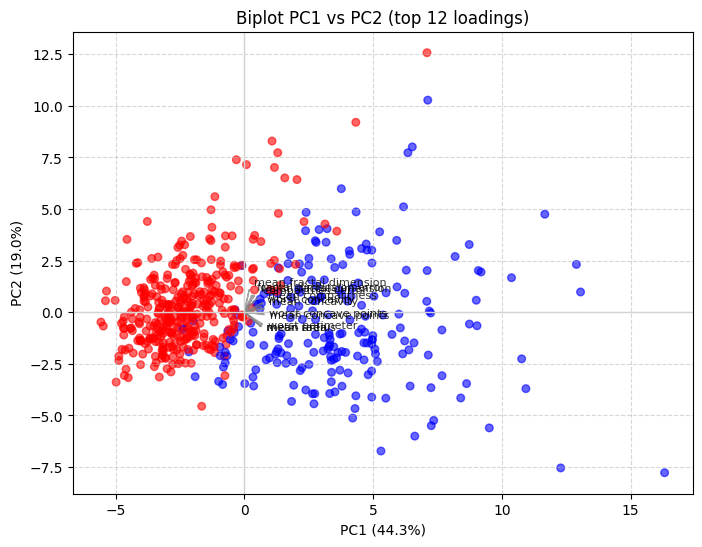

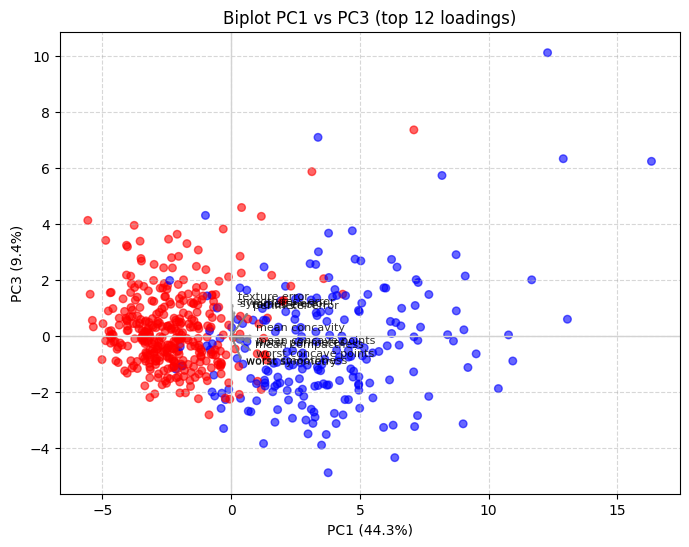


Silhouette score before PCA: 0.345
Clustering accuracy before PCA: 0.912 

Silhouette score after PCA: 0.508
Clustering accuracy after PCA: 0.907

Q8. Silhouette before PCA = 0.345, after PCA = 0.508.
Accuracy before PCA = 0.912, after PCA = 0.907.

→ PCA reduced dimensionality to 2, preserving most of the variance. 
   Silhouette changed by +0.164, showing cluster compactness 
   is still very good in the 2-D PC space. Accuracy is nearly unchanged, 
   meaning the main structure distinguishing malignant vs benign is captured in the first two PCs.



In [3]:
# 1. Prepare the data
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
df = pd.DataFrame(breast.data, columns=breast.feature_names)
labels = breast.target            # 0 = malignant, 1 = benign

# Q1. How many observations?
n = df.shape[0]
print(f"Q1: Number of observations = {n}")

# Q2. How many are malignant (target == 0)?
n_malig = np.sum(labels == 0)
print(f"Q2: Number of malignant cases = {n_malig}")

# 2. Exploratory Data Analysis: check means & stds
means = df.mean()
stds  = df.std()
print("\nFirst 5 feature means:\n", means.head())
print("\nFirst 5 feature stds:\n",  stds.head())
# → if means & stds vary wildly, we should scale before PCA.

# 3. Perform PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale data before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca = PCA().fit(X_scaled)
explained = pca.explained_variance_ratio_

# Q3. Variance captured by PC1
print(f"\nQ3: Variance by PC1 = {explained[0]:.3f}")

# Q4/Q5: # PCs for ≥70% and ≥90% variance
cumvar = np.cumsum(explained)
n70 = np.searchsorted(cumvar, 0.70) + 1
n90 = np.searchsorted(cumvar, 0.90) + 1
print(f"Q4: # PCs for 70% variance = {n70}")
print(f"Q5: # PCs for 90% variance = {n90}")

# 4. Biplots
import matplotlib.pyplot as plt

def biplot(df, labels, pcs, explained, pc_axes=(0,1), top_k=10, arrow_scale=3.0, text_offset=0.2):
    """
    df         : original DataFrame of features
    labels     : true class labels (0/1)
    pcs        : fitted PCA object
    explained  : pcs.explained_variance_ratio_
    pc_axes    : tuple of PC indices to plot (zero-based)
    top_k      : only annotate top_k features by loading magnitude
    arrow_scale: how far to draw arrows (bigger = longer arrows)
    text_offset: offset for the text label from the arrow tip
    """
    i, j = pc_axes
    Xp = pcs.transform(X_scaled)  # X_scaled = your scaled feature matrix
    loadings = pcs.components_[[i, j], :].T  # shape=(n_features, 2)

    # pick the top_k features by max(|loading_i|, |loading_j|)
    loading_mags = np.max(np.abs(loadings), axis=1)
    top_idx = np.argsort(loading_mags)[-top_k:]

    plt.figure(figsize=(8,6))
    # scatter points
    plt.scatter(Xp[:, i], Xp[:, j], c=labels, cmap='bwr', alpha=0.6, s=30)
    # axes labels
    plt.xlabel(f"PC{i+1} ({explained[i]*100:.1f}%)")
    plt.ylabel(f"PC{j+1} ({explained[j]*100:.1f}%)")
    plt.title(f"Biplot PC{i+1} vs PC{j+1} (top {top_k} loadings)")

    # draw arrows and text for top features only
    for idx in top_idx:
        x_loading, y_loading = loadings[idx] * arrow_scale
        feat_name = df.columns[idx]
        plt.arrow(0, 0, x_loading, y_loading,
                  color='grey', alpha=0.7, head_width=0.05, length_includes_head=True)
        plt.text(x_loading + np.sign(x_loading)*text_offset,
                 y_loading + np.sign(y_loading)*text_offset,
                 feat_name, fontsize=8, alpha=0.8)

    # draw origin lines
    plt.axhline(0, color='lightgrey', linewidth=1)
    plt.axvline(0, color='lightgrey', linewidth=1)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


biplot(
    df=df,
    labels=labels,
    pcs=pca,
    explained=explained,
    pc_axes=(0,1),
    top_k=12,            # e.g. label the top 12 loadings
    arrow_scale=3.0,
    text_offset=0.2
)
  # PC1 vs PC2
# Q6: What stands out?  (Answer: clear separation along PC1, many arrows cluster → correlated features)
biplot(
    df=df,
    labels=labels,
    pcs=pca,
    explained=explained,
    pc_axes=(0,2),
    top_k=12,
    arrow_scale=3.0,
    text_offset=0.2
)
  # PC1 vs PC3
# Q7: Notice that PC3 adds little new separation; clusters remain aligned mainly on PC1.

# 5. K-Means on original features
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_scaled)
clusters = kmeans.labels_

sil_before = silhouette_score(X_scaled, clusters)
print(f"\nSilhouette score before PCA: {sil_before:.3f}")

# majority‐vote mapping
mapping = {}
for c in [0,1]:
    idx = (clusters==c)
    # count true labels in this cluster
    counts = np.bincount(labels[idx])
    mapping[c] = np.argmax(counts)
mapped = np.vectorize(mapping.get)(clusters)
acc_before = np.mean(mapped == labels)
print(f"Clustering accuracy before PCA: {acc_before:.3f} ")

# 6. Now reduce to 2 PCs, then K-Means again
X_pca2 = PCA(n_components=2).fit_transform(X_scaled)

kmeans2 = KMeans(n_clusters=2, random_state=42).fit(X_pca2)
clusters2 = kmeans2.labels_

sil_after = silhouette_score(X_pca2, clusters2)
print(f"\nSilhouette score after PCA: {sil_after:.3f}")

mapping2 = {}
for c in [0,1]:
    idx = (clusters2==c)
    counts = np.bincount(labels[idx])
    mapping2[c] = np.argmax(counts)
mapped2 = np.vectorize(mapping2.get)(clusters2)
acc_after = np.mean(mapped2 == labels)
print(f"Clustering accuracy after PCA: {acc_after:.3f}")

# 8. Q8 explanation
print(f"""
Q8. Silhouette before PCA = {sil_before:.3f}, after PCA = {sil_after:.3f}.
Accuracy before PCA = {acc_before:.3f}, after PCA = {acc_after:.3f}.

→ PCA reduced dimensionality to 2, preserving most of the variance. 
   Silhouette changed by {sil_after - sil_before:+.3f}, showing cluster compactness 
   is still very good in the 2-D PC space. Accuracy is nearly unchanged, 
   meaning the main structure distinguishing malignant vs benign is captured in the first two PCs.
""")
